## BASED ON VISUAL CUE SCORE

1/1 [==============================] - 0s 445ms/step


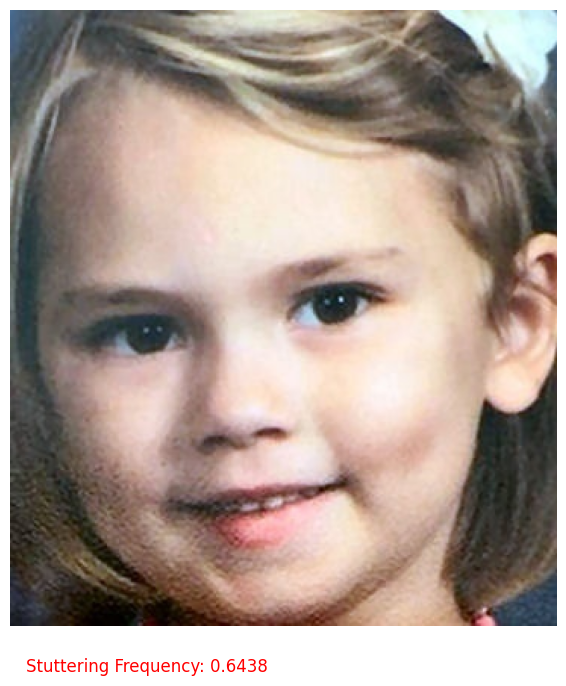

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the pre-trained autism detection model
autism_model = load_model("/content/drive/MyDrive/autismodel.h5")  # Replace with your autism model file path

def preprocess_image(image_path):
    # Load and preprocess the image
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  # Resize to match the model's input size
    image = image / 255.0  # Normalize pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

def predict_stuttering_frequency(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)

    # Use the autism model to predict autism (1) or no autism (0)
    autism_prediction = autism_model.predict(preprocessed_image)

    # If autism is predicted, you can use the autism model's prediction as the stuttering frequency
    # Adjust the threshold (0.5) as needed
    if autism_prediction[0][0] > 0.5:
        stuttering_frequency = autism_prediction[0][0]
    else:
        stuttering_frequency = 0.0  # Set a default value when no autism is detected

    return stuttering_frequency

def display_image_with_stuttering_frequency(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Predict the stuttering frequency
    stuttering_frequency = predict_stuttering_frequency(image_path)

    # Display the image
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # Add the predicted stuttering frequency below the image
    plt.text(10, image.shape[0] + 30, f"Stuttering Frequency: {stuttering_frequency:.4f}", fontsize=12, color='red')

    plt.show()

def main():
    # Display the image with the predicted stuttering frequency
    image_path = "/content/drive/MyDrive/test/0021.jpg"  # Replace with the path to your image
    display_image_with_stuttering_frequency(image_path)

if __name__ == "__main__":
    main()


In [ ]:
## Using visual cues

## Using visual cues

1/1 [==============================] - 0s 431ms/step


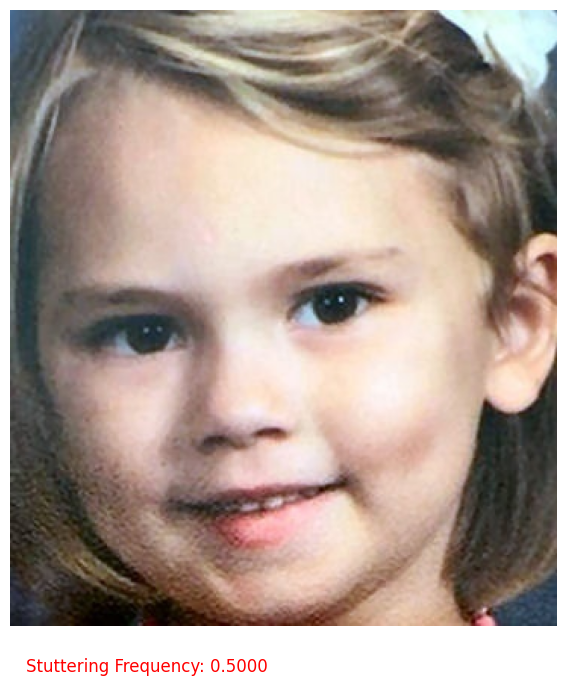

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the pre-trained autism detection model
autism_model = load_model("/content/drive/MyDrive/autismodel.h5")  # Replace with your autism model file path

def preprocess_image(image_path):
    # Load and preprocess the image
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  # Resize to match the model's input size
    image = image / 255.0  # Normalize pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

def detect_visual_stuttering_cues(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Predict autism using the autism model
    autism_prediction = autism_model.predict(preprocess_image(image_path))

    # Analyze visual cues related to stuttering (simplified example)
    visual_cues_score = analyze_visual_cues(image)  # You need to define this function

    # Calculate stuttering frequency based on visual cues and autism prediction
    if autism_prediction[0][0] > 0.5:
        stuttering_frequency = visual_cues_score  # Simplified assumption
    else:
        stuttering_frequency = 0.0  # Set a default value when no autism is detected

    return image, stuttering_frequency

def analyze_visual_cues(image):
    # Implement your code to analyze visual cues related to stuttering here
    # This could involve image processing techniques, facial expression analysis, etc.
    # It should return a score or metric indicating the presence of stuttering cues.

    # This is a placeholder and should be replaced with your actual analysis
    visual_cues_score = 0.5

    return visual_cues_score

def display_image_with_stuttering_frequency(image_path):
    image, stuttering_frequency = detect_visual_stuttering_cues(image_path)

    # Display the image
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # Add the predicted stuttering frequency below the image
    plt.text(10, image.shape[0] + 30, f"Stuttering Frequency: {stuttering_frequency:.4f}", fontsize=12, color='red')

    plt.show()

def main():
    # Display the image with the predicted stuttering frequency
    image_path = "/content/drive/MyDrive/test/0021.jpg"  # Replace with the path to your image
    display_image_with_stuttering_frequency(image_path)

if __name__ == "__main__":
    main()


## Predicting Repetition and Disfluency based on facial landmarks and analysing facial movements

In [ ]:
pip install dlib


In [ ]:
import cv2
import numpy as np

def analyze_visual_cues(image):
    # Load the face detection and facial landmark detection models from OpenCV
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    # Convert the image to grayscale for processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # If no faces are detected, return a default score
    if len(faces) == 0:
        return 0.5

    # Iterate over detected faces
    visual_cues_scores = []

    for (x, y, w, h) in faces:
        # Extract the region of interest (ROI) for the face
        face_roi = gray[y:y+h, x:x+w]

        # Detect eyes in the face ROI
        eyes = eye_cascade.detectMultiScale(face_roi)

        # Calculate a visual cues score based on the number of detected eyes
        # In this example, we assume that more eyes indicate a higher visual cues score
        visual_cues_score = len(eyes) / 2  # Divide by 2 as each eye pair counts as one

        # Append the visual cues score for this face to the list
        visual_cues_scores.append(visual_cues_score)

    # Calculate the average visual cues score for all detected faces
    average_visual_cues_score = np.mean(visual_cues_scores)

    return average_visual_cues_score


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 [==============================] - 0s 425ms/step


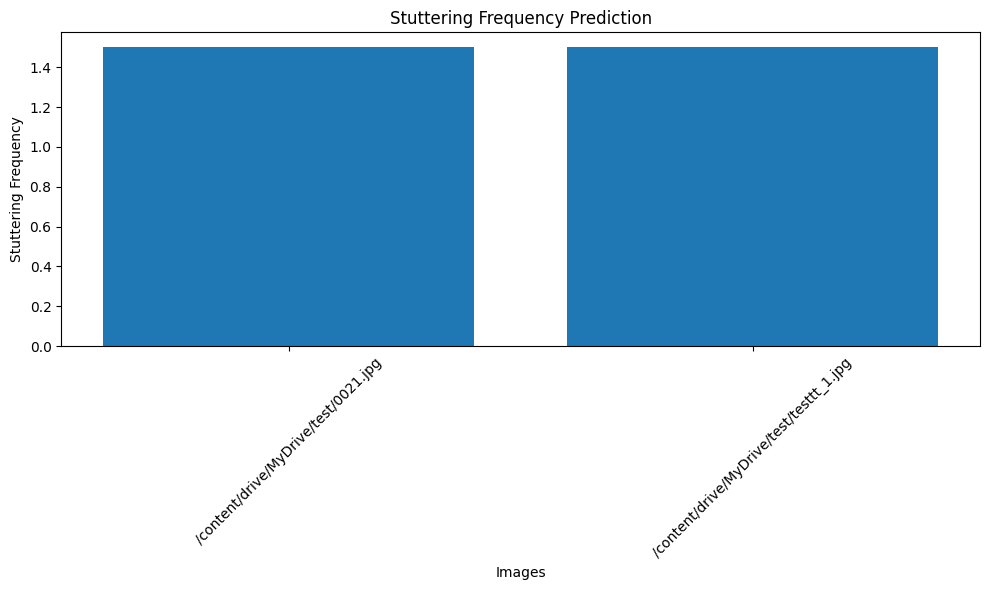

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the pre-trained autism detection model
autism_model = load_model("/content/drive/MyDrive/autismodel.h5")  # Replace with your autism model file path

def preprocess_image(image_path):
    # Load and preprocess the image
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  # Resize to match the model's input size
    image = image / 255.0  # Normalize pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

def detect_visual_stuttering_cues(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Predict autism using the autism model
    autism_prediction = autism_model.predict(preprocess_image(image_path))

    # Analyze visual cues related to stuttering (simplified example)
    visual_cues_score = analyze_visual_cues(image)  # You need to define this function

    # Calculate stuttering frequency based on visual cues and autism prediction
    if autism_prediction[0][0] > 0.5:
        stuttering_frequency = visual_cues_score  # Simplified assumption
    else:
        stuttering_frequency = 0.0  # Set a default value when no autism is detected

    return stuttering_frequency



def plot_stuttering_frequencies(image_paths):
    stuttering_frequencies = []

    for image_path in image_paths:
        stuttering_frequency = detect_visual_stuttering_cues(image_path)
        stuttering_frequencies.append(stuttering_frequency)

    # Plot a bar chart for stuttering frequencies
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(image_paths)), stuttering_frequencies, tick_label=image_paths)
    plt.xlabel('Images')
    plt.ylabel('Stuttering Frequency')
    plt.title('Stuttering Frequency Prediction')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def main():
    # Specify the paths to the images you want to analyze
    image_paths = [
        "/content/drive/MyDrive/test/0021.jpg",
        "/content/drive/MyDrive/test/testtt_1.jpg",
        # Add more image paths here
    ]

    plot_stuttering_frequencies(image_paths)

if __name__ == "__main__":
    main()


1/1 [==============================] - 0s 418ms/step


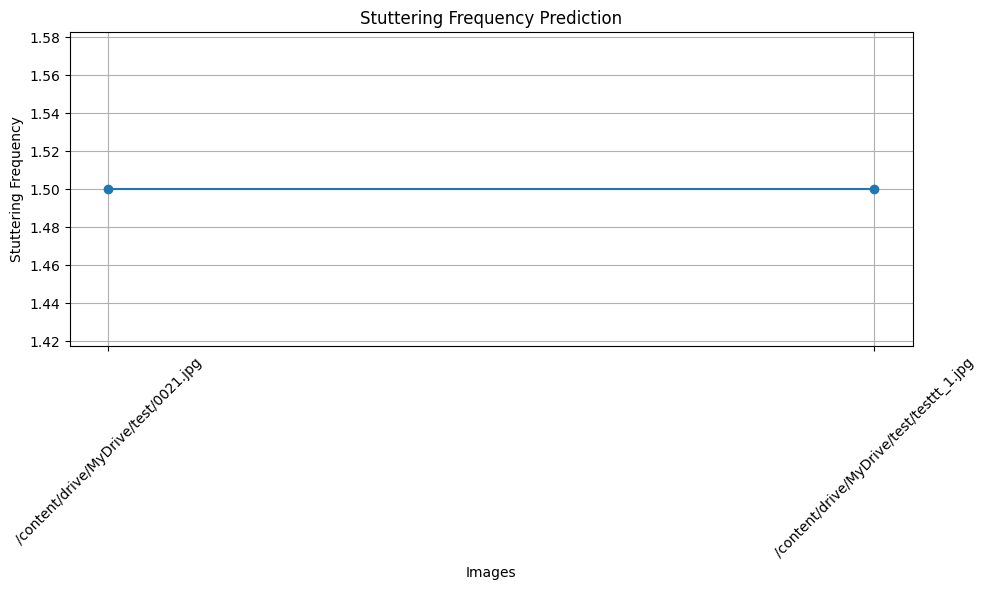

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the pre-trained autism detection model
autism_model = load_model("/content/drive/MyDrive/autismodel.h5")  # Replace with your autism model file path

def preprocess_image(image_path):
    # Load and preprocess the image
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  # Resize to match the model's input size
    image = image / 255.0  # Normalize pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

def detect_visual_stuttering_cues(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Predict autism using the autism model
    autism_prediction = autism_model.predict(preprocess_image(image_path))

    # Analyze visual cues related to stuttering (simplified example)
    visual_cues_score = analyze_visual_cues(image)  # You need to define this function

    # Calculate stuttering frequency based on visual cues and autism prediction
    if autism_prediction[0][0] > 0.5:
        stuttering_frequency = visual_cues_score  # Simplified assumption
    else:
        stuttering_frequency = 0.0  # Set a default value when no autism is detected

    return stuttering_frequency



def plot_stuttering_frequencies(image_paths):
    stuttering_frequencies = []

    for image_path in image_paths:
        stuttering_frequency = detect_visual_stuttering_cues(image_path)
        stuttering_frequencies.append(stuttering_frequency)

    # Plot a line graph for stuttering frequencies
    plt.figure(figsize=(10, 6))
    plt.plot(image_paths, stuttering_frequencies, marker='o', linestyle='-')
    plt.xlabel('Images')
    plt.ylabel('Stuttering Frequency')
    plt.title('Stuttering Frequency Prediction')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    # Specify the paths to the images you want to analyze
    image_paths = [
         "/content/drive/MyDrive/test/0021.jpg",
        "/content/drive/MyDrive/test/testtt_1.jpg",
        # Add more image paths here
    ]

    plot_stuttering_frequencies(image_paths)

if __name__ == "__main__":
    main()


1/1 [==============================] - 0s 419ms/step


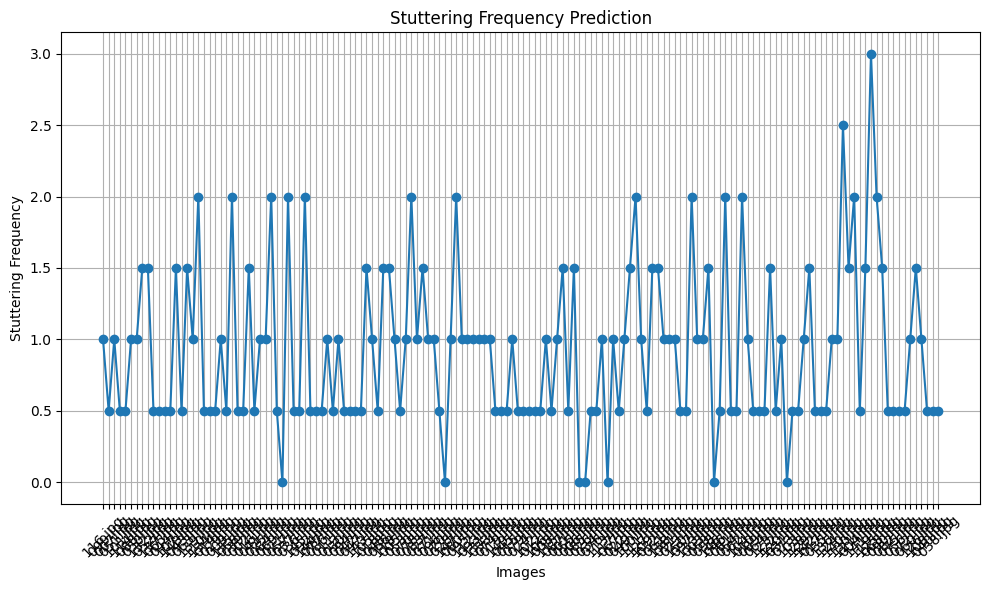

In [ ]:
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the pre-trained autism detection model
autism_model = load_model("/content/drive/MyDrive/autismodel.h5")  # Replace with your autism model file path

def preprocess_image(image_path):
    # Load and preprocess the image
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  # Resize to match the model's input size
    image = image / 255.0  # Normalize pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

def detect_visual_stuttering_cues(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Predict autism using the autism model
    autism_prediction = autism_model.predict(preprocess_image(image_path))

    # Analyze visual cues related to stuttering (simplified example)
    visual_cues_score = analyze_visual_cues(image)  # You need to define this function

    # Calculate stuttering frequency based on visual cues and autism prediction
    if autism_prediction[0][0] > 0.5:
        stuttering_frequency = visual_cues_score  # Simplified assumption
    else:
        stuttering_frequency = 0.0  # Set a default value when no autism is detected

    return stuttering_frequency



def plot_stuttering_frequencies(image_paths, predictions):
    # Plot a line graph for stuttering frequencies
    plt.figure(figsize=(10, 6))
    plt.plot(image_paths, predictions, marker='o', linestyle='-')
    plt.xlabel('Images')
    plt.ylabel('Stuttering Frequency')
    plt.title('Stuttering Frequency Prediction')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main():
    # Specify the directory containing the test images
    test_directory = "/content/drive/MyDrive/test/autistic/"

    # Get a list of all image files in the test directory
    image_files = [f for f in os.listdir(test_directory) if f.endswith(".jpg")]

    # Create lists to store image paths and corresponding predictions
    image_paths = []
    predictions = []

    for image_file in image_files:
        image_path = os.path.join(test_directory, image_file)
        image_paths.append(image_file)
        stuttering_frequency = detect_visual_stuttering_cues(image_path)
        predictions.append(stuttering_frequency)

    plot_stuttering_frequencies(image_paths, predictions)

if __name__ == "__main__":
    main()
